# Kalman filter gyro bias response time scale

This notebook uses the OBC pitch gyro bias values for obsid 18265 at around 2017:073:09:15:00
to estimate the response time scale of the Kalman filter gyro bias estimate.  In this case
it would appear there was a jog during the maneuver which made the value from before the
maneuver be off by about 0.02 arcsec/sec.

Assuming the filter behaves like an RC-filter to an impulse response, it appears the timescale
is $\tau \sim 4$ minutes.  Another way to characterize this is that the estimate will converge to
90% of the final value within about 7 minutes.

If this is correct then using the bias estimate of the OBC Kalman filter should provide a
reasonable representation of the true bias, as long as the intrinsic variability time scale is longer than
about 7 minutes.

In order to squeeze under that time scale and still cause appreciable maneuver errors the intrinsic bias variability would need to be very high.  For instance a 60 arcsec error in 300 secs => 0.2 arcsec/sec bias excursion.

In [1]:
from Ska.Matplotlib import plot_cxctime
from Ska.engarchive import fetch_eng as fetch
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

In [2]:
dat = fetch.Msid('aogbias2', '2017:073:09:14:00', '2017:073:09:30:00')
dat.vals = np.degrees(dat.vals) * 3600

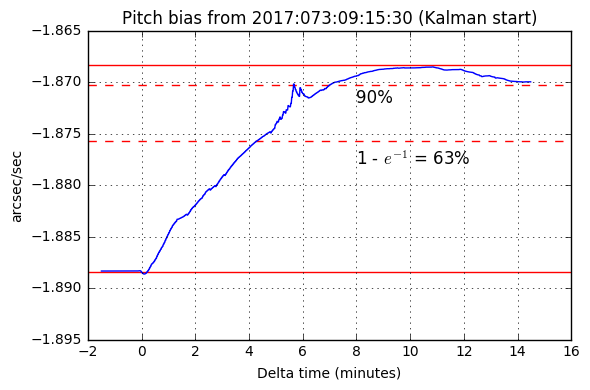

In [3]:
plt.figure()
times = (dat.times - dat.times[0] - 90) / 60
plt.plot(times, dat.vals)
plt.grid()
x0, x1 = plt.xlim()
plt.ylim(-1.895, -1.865)
plt.hlines([-1.8884, -1.8683], x0, x1, 'r')
plt.hlines([-1.8757, -1.8703], x0, x1, 'r', linestyle='--')
plt.xlabel('Delta time (minutes)')
plt.ylabel('arcsec/sec')
plt.title('Pitch bias from 2017:073:09:15:30 (Kalman start)')
plt.text(8, -1.872, '90%', fontsize='large')
plt.text(8, -1.878, '1 - $e^{-1}$ = 63%', fontsize='large')
plt.tight_layout()